In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [79]:
def f(x):
    return 3*x + 4 + random.uniform(-0.5, 10)
vf = np.vectorize(f)

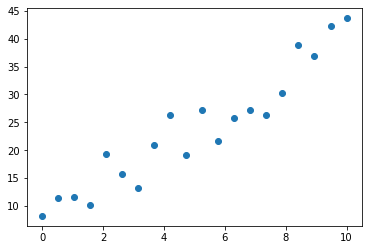

In [80]:
data = np.linspace(0, 10, 20)
data = np.vstack((data, vf(data)))
data = data.T
X = data[:, 0]
Y = data[:, 1]
plt.scatter(X, Y)

In [81]:
input = np.linspace(0, 10, 100)
model = np.array((1, 0))

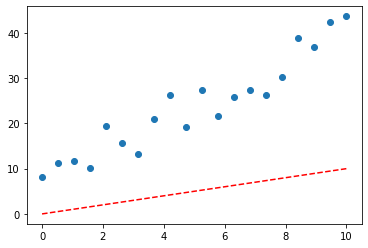

In [82]:
predict = input.dot(model[0]) + model[1]
plt.scatter(X, Y)
plt.plot(input, predict, 'r--')

## MAE

Cost: $$MAE = \frac{1}{n}\sum(y-\hat{y})$$

Gradient:
$$\frac{dC}{dw_1}=\frac{1}{n}\sum{|-w_1|}$$

$$\frac{dC}{dw_2}=\frac{1}{n}\sum{|-1|}=1$$

Not gonna work :(

In [83]:
mae = (Y - X * model[0] + model[1]).sum() / len(X)
mae

18.811583836075865

## MSE

Cost:
$$MSE=\frac{1}{n}\sum{(y-\hat{y})}^2$$
$$\frac{d}{dw_1}=\frac{1}{n}\sum{-2x(-xw_1 - w_2 + y)}$$
$$\frac{d}{dw_2}=\frac{1}{n}\sum{-2(-xw_1 - w_2 + y)}$$

In [84]:
mse = np.power((Y - X * model[0] + model[1]), 2).sum() / len(X)
mse

412.2825534079281

In [85]:
w_1 = (-2 * X * (-1 * X * model[0] - model[1] + Y)).sum() / len(X)
w_1

-229.87008226373823

In [86]:
w_2 = (-2 * (-1 * X * model[0] - model[1] + Y)).sum() / len(X)
w_2

-37.62316767215173

In [87]:
model = model - np.array((w_1, w_2)) * 0.01
model

array([3.29870082, 0.37623168])

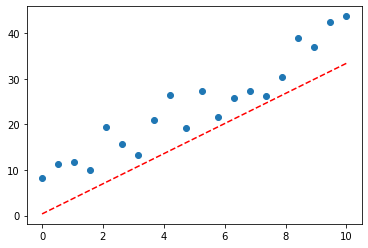

In [88]:
predict = input.dot(model[0]) + model[1]
plt.scatter(X, Y)
plt.plot(input, predict, 'r--')

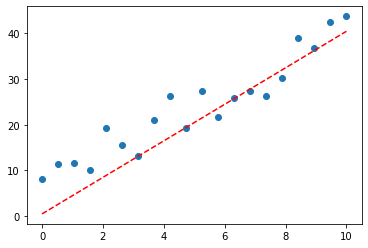

In [89]:
w_1 = (-2 * X * (-1 * X * model[0] - model[1] + Y)).sum() / len(X)
w_2 = (-2 * (-1 * X * model[0] - model[1] + Y)).sum() / len(X)
model = model - np.array((w_1, w_2)) * 0.01
predict = input.dot(model[0]) + model[1]
plt.scatter(X, Y)
plt.plot(input, predict, 'r--')

In [90]:
w_1_hist = np.array(())
w_2_hist = np.array(())
mse_hist = np.array(())

for i in range(0, 1000):
    w_1 = (-2 * X * (-1 * X * model[0] - model[1] + Y)).sum() / len(X)
    w_2 = (-2 * (-1 * X * model[0] - model[1] + Y)).sum() / len(X)
        
    model = model - np.array((w_1, w_2)) * 0.01
    w_1_hist = np.append(w_1_hist, model[0])
    w_2_hist = np.append(w_2_hist, model[1])

    mse = np.power((Y - X * model[0] - model[1]), 2).sum() / len(X)
    mse_hist = np.append(mse_hist, mse)

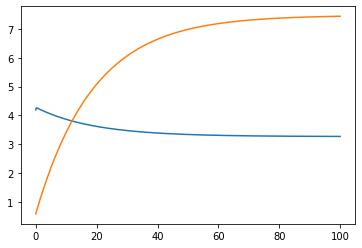

In [91]:
plt.plot(np.linspace(0, 100, len(w_1_hist)), w_1_hist)
plt.plot(np.linspace(0, 100, len(w_2_hist)), w_2_hist)

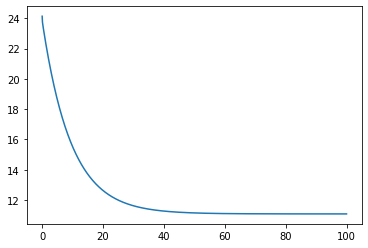

In [92]:
plt.plot(np.linspace(0, 100, len(mse_hist)), mse_hist)

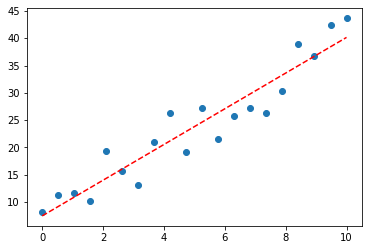

In [93]:
predict = input.dot(model[0]) + model[1]
plt.scatter(X, Y)
plt.plot(input, predict, 'r--')